In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

C:\Users\HP-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'Gamma(attenuation)')

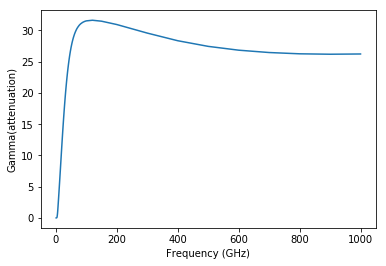

In [3]:
data = pd.read_excel("dsh.xlsx")
def formula(kh,ah):
    return kh*(100**ah)

data["gamma"] = [i for i in formula(data["kH"],data["aH"])]
data["Frequency (GHz)"][115]=1000

x1=data["Frequency (GHz)"]
y1=data["gamma"]

plt.plot(x1,y1)
plt.xlabel("Frequency (GHz)")
plt.ylabel("Gamma(attenuation)")

Text(0,0.5,'Gamma(attenuation)')

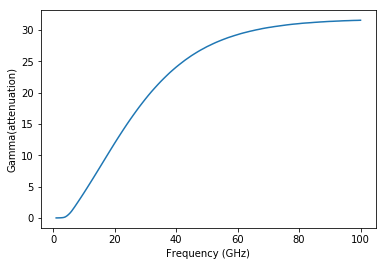

In [7]:
df=data[0:105]
x=df["Frequency (GHz)"]
y=df["gamma"]
plt.plot(x,y)
plt.xlabel("Frequency (GHz)")
plt.ylabel("Gamma(attenuation)")

In [8]:
def fit(t,tau,theta):
    t = np.array(t,dtype=float)
    return theta + np.log(7.9+t)*tau

In [9]:
c,cov = curve_fit(fit,x,y)

In [10]:
yopt = fit(x,c[0],c[1])

In [11]:
r1 = r2_score(y,yopt)
r1

0.9720124354821783

Text(0,0.5,'Gamma(attenuation)')

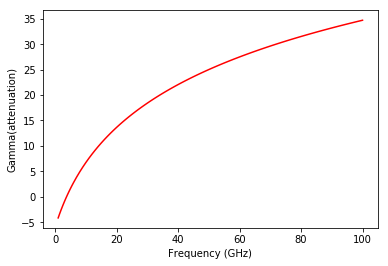

In [12]:
plt.plot(x,yopt,color="red")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Gamma(attenuation)")

Text(0,0.5,'Gamma(attenuation)')

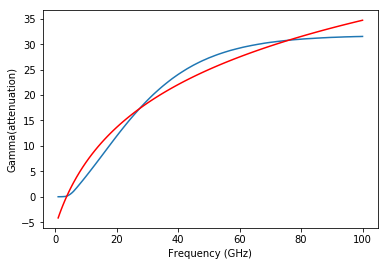

In [14]:
plt.plot(x,y)
plt.plot(x,yopt,color="red")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Gamma(attenuation)")

In [8]:
cov

array([[ 0.06788891, -0.26004701],
       [-0.26004701,  1.02898644]])

In [9]:
c

array([ 15.58372854, -38.22986675])

In [10]:
print(mean_absolute_error(y,yopt))

1.6208415620423493


In [11]:
print(mean_squared_error(y,yopt))

3.386833536568084


In [ ]:
#0.000003*x**3 + 0.000450*x**2 - 0.002171*x - 0.006961